### Capstone Project Home Credit Default Risk



## Overview :

There are lots of people who do not particularly have a prior credit history, for example students, small businessmen, etc. who need credits, be it for studies, or for setting up some sort of businesses. Without adequate credit history, the lending organizations find it difficult to lend credits to such people, as these loans could be associated with high risks. In these kinds of situations, some lending organizations even tend to exploit the borrowers by asking for too high of an interest rate.<br>
There are another subset of people, who do have prior credit history, which could be with the same organization or some other organizations. However, going through that historical data could be very time consuming and redundant. This would scale up even further as the number of applicants increases.<br>
For such cases, if there could be a way through which the lending organization could predict or estimate the borrower’s repayment capability, the process could be streamlined and be made effective for both the lender and the borrower. It could save resources both in terms of humans and time.<br>
So the main two questions that the lender needs answer to are:<br>
1) How risky is the borrower?<br>
2) Given the borrower’s risk, should we give him/her loan?<br>



#### Business Objective: Home Credit Default Risk
Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.<br>
 
Home depot wants to have a model that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.<br>


## Data:

Data for this project is from a Kaggle competition. Description of the data is below:<br>


<b>application_{train|test}.csv</b><br>

- This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).<br>
- Static data for all applications. One row represents one loan in our data sample.<br>

<b>bureau.csv</b><br>

- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).<br>
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.<br>

<b>bureau_balance.csv</b><br>

- Monthly balances of previous credits in Credit Bureau.<br>
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.<br>


<b>POS_CASH_balance.csv</b><br>

- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.<br>

<b>credit_card_balance.csv</b><br>

- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.<br>
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.<br>

<b>previous_application.csv</b><br>

- All previous applications for Home Credit loans of clients who have loans in our sample.<br>
- There is one row for each previous application related to loans in our data sample.<br>

<b>installments_payments.csv</b><br>

- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.<br>
- There is a) one row for every payment that was made plus b) one row each for missed payment.<br>
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.<br>

<b>HomeCredit_columns_description.csv</b><br>

- This file contains descriptions for the columns in the various data files.

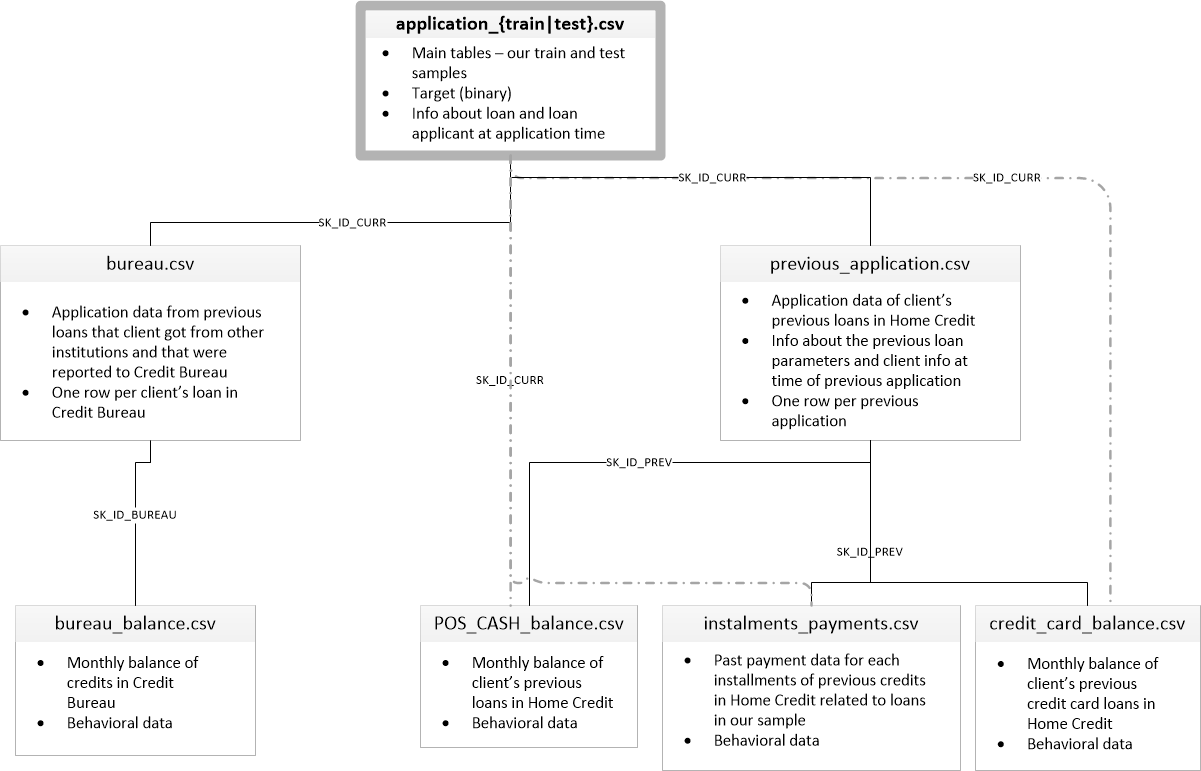

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score
from sklearn.neural_network import MLPClassifier
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string




In [4]:
train = pd.read_csv( 'application_train.csv')
test = pd.read_csv('application_test.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print('Training set shape:', train.shape)
print('Test set shape:    ', test.shape)

Training set shape: (307511, 122)
Test set shape:     (48744, 121)


In [6]:
train.TARGET.value_counts() / len(train)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [7]:
train = train.dropna(how='all')
train.shape

(307511, 122)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 288.6+ MB


## Exploratory Data Analysis

0    282686
1     24825
Name: TARGET, dtype: int64


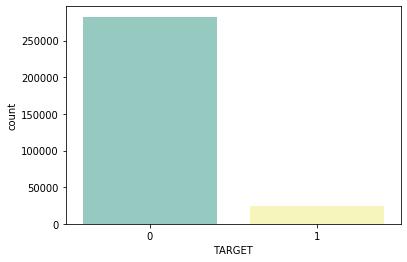

In [16]:
print(train['TARGET'].value_counts())
sns.countplot(train['TARGET'],palette='Set3')
plt.savefig('target.png',dpi=300,bbox_inches='tight')
plt.show()

Target is very unbalaced which is normal. Which means most peopel are cleared to get a loan

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


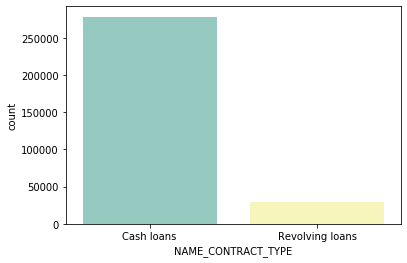

In [18]:
print(train['NAME_CONTRACT_TYPE'].value_counts())
sns.countplot(train['NAME_CONTRACT_TYPE'],palette='Set3')
plt.savefig('namecontract.png',dpi=300,bbox_inches='tight')
plt.show()

Around 90% of contract type is cash loan and 10% is revolving loan

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


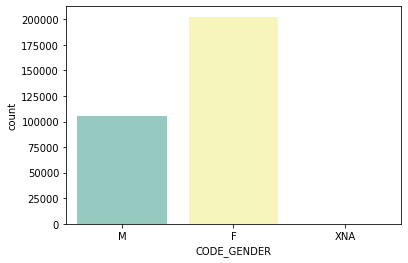

In [20]:
print(train['CODE_GENDER'].value_counts())
sns.countplot(train['CODE_GENDER'],palette='Set3')
plt.savefig('codegender.png',dpi=300,bbox_inches='tight')
plt.show()


In [21]:
a=train['CODE_GENDER'].value_counts()
a.M/(a.M+a.F)

0.34164750721121795

More than 66% of applicants are female.

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


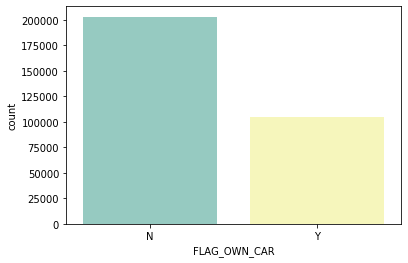

In [22]:
print(train['FLAG_OWN_CAR'].value_counts())
sns.countplot(train['FLAG_OWN_CAR'],palette='Set3')
plt.savefig('flagcar.png',dpi=300,bbox_inches='tight')
plt.show()

In [23]:
a = train['FLAG_OWN_CAR'].value_counts()
a.N/(a.N+a.Y)

0.6598918412674668

About 66% of applicants do not own a car

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


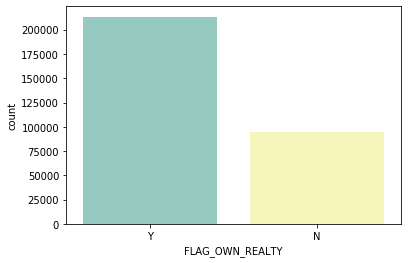

In [25]:
print(train['FLAG_OWN_REALTY'].value_counts())
sns.countplot(train['FLAG_OWN_REALTY'],palette='Set3')
plt.savefig('flagown.png',dpi=300,bbox_inches='tight')
plt.show()

In [26]:
a=train['FLAG_OWN_REALTY'].value_counts()
a.N/(a.N+a.Y)

0.30632725333402705

About 70% have their own realty

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64


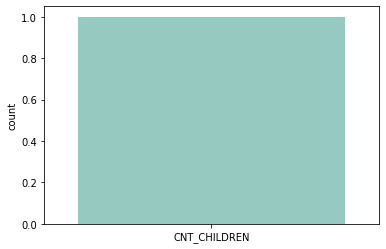

In [31]:
print(train['CNT_CHILDREN'].value_counts())
sns.countplot(['CNT_CHILDREN'],palette="Set3")
plt.show() #Number of children the client has

In [33]:
train['AMT_INCOME_TOTAL'].describe()['mean']

168797.9192969845

In [34]:
train['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [36]:
train['AMT_CREDIT'].describe()['mean']

599025.9997057016

In [37]:
train['AMT_GOODS_PRICE'].describe()['mean']


538396.2074288895

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


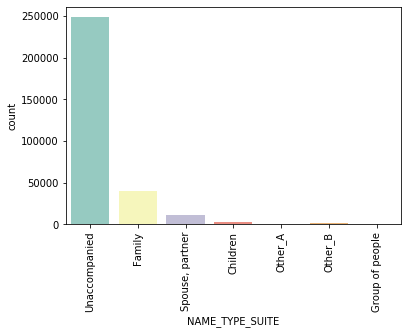

<Figure size 432x288 with 0 Axes>

In [39]:
print(train['NAME_TYPE_SUITE'].value_counts())
sns.countplot(train['NAME_TYPE_SUITE'],palette="Set3")
plt.xticks(rotation=90)
plt.show() #Who was accompanying client when he was applying for the loan
plt.savefig('nametype.png',dpi=300,bbox_inches='tight')


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


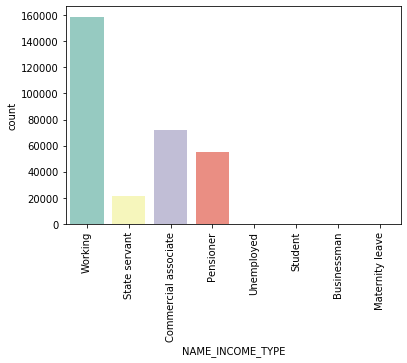

In [41]:
print(train['NAME_INCOME_TYPE'].value_counts())
sns.countplot(train['NAME_INCOME_TYPE'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameincome.png',dpi=300,bbox_inches='tight')
plt.show() #Clients income type (businessman, working, maternity leave, ...)

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


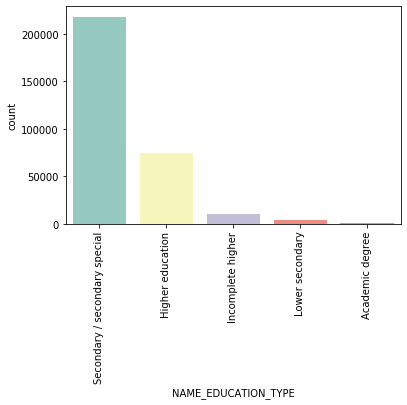

In [42]:
print(train['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(train['NAME_EDUCATION_TYPE'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameedu',dpi=300,bbox_inches='tight')
plt.show() #Level of highest education the client achieved

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


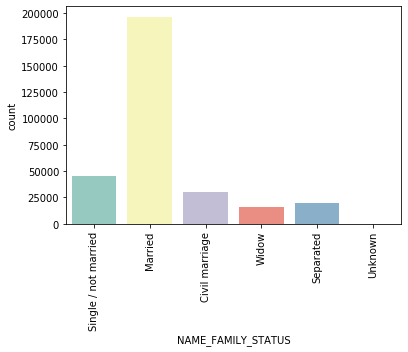

In [43]:
print(train['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(train['NAME_FAMILY_STATUS'],palette="Set3")
plt.xticks(rotation=90)
plt.savefig('nameFam.png',dpi=300,bbox_inches='tight')
plt.show() #Family status of the client

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


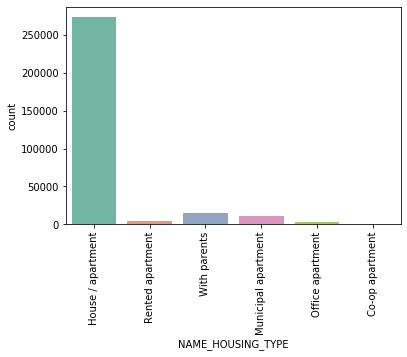

In [44]:
print(train['NAME_HOUSING_TYPE'].value_counts())
sns.countplot(train['NAME_HOUSING_TYPE'],palette="Set2")
plt.xticks(rotation=90)
plt.show() #What is the housing situation of the client (renting, living with parents, ...)


In [45]:
train['REGION_POPULATION_RELATIVE'].describe() 
#Normalized population of region where client lives (higher number means the client lives in more populated region)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [46]:
train['DAYS_BIRTH'].describe()
#Client's age in days at the time of application-time only relative to the application

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [47]:
train['DAYS_EMPLOYED'].describe()
#How many days before the application the person started current employment-time only relative to the application

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### Change columns with string to integer

In [48]:
train=train[train['CODE_GENDER']!='XNA']
train['NAME_CONTRACT_TYPE']=pd.get_dummies(train['NAME_CONTRACT_TYPE'])['Cash loans']
train['CODE_GENDER']=pd.get_dummies(train['CODE_GENDER'])['F']
train['FLAG_OWN_CAR']=pd.get_dummies(train['FLAG_OWN_CAR'])['Y']
train['FLAG_OWN_REALTY']=pd.get_dummies(train['FLAG_OWN_REALTY'])['Y']
train.NAME_INCOME_TYPE = pd.Categorical(train.NAME_INCOME_TYPE)
train['NAME_INCOME_TYPE'] = train.NAME_INCOME_TYPE.cat.codes
train.NAME_EDUCATION_TYPE = pd.Categorical(train.NAME_EDUCATION_TYPE)
train['NAME_EDUCATION_TYPE'] = train.NAME_EDUCATION_TYPE.cat.codes
dict3={'Single / not married':0, 'Married':1, 'Civil marriage':2, 'Widow':3,
       'Separated':4, 'Unknown':5}
train['NAME_FAMILY_STATUS']=train['NAME_FAMILY_STATUS'].map(dict3)
dict4={'House / apartment':0, 'Rented apartment':1, 'With parents':2,
       'Municipal apartment':3, 'Office apartment':4, 'Co-op apartment':5}
train['NAME_HOUSING_TYPE']=train['NAME_HOUSING_TYPE'].map(dict4)
dict5={'WEDNESDAY':2, 'MONDAY':0, 'THURSDAY':3, 'SUNDAY':6, 'SATURDAY':5, 'FRIDAY':4,
       'TUESDAY':1}
train['WEEKDAY_APPR_PROCESS_START']=train['WEEKDAY_APPR_PROCESS_START'].map(dict5)
dict6={'Business Entity Type 3':0, 'School':1, 'Government':2, 'Religion':3,
       'Other':4, 'XNA':5, 'Electricity':6, 'Medicine':7,
       'Business Entity Type 2':8, 'Self-employed':9, 'Transport: type 2':10,
       'Construction':11, 'Housing':12, 'Kindergarten':13, 'Trade: type 7':14,
       'Industry: type 11':15, 'Military':16, 'Services':17, 'Security Ministries':18,
       'Transport: type 4':19, 'Industry: type 1':20, 'Emergency':21, 'Security':22,
       'Trade: type 2':23, 'University':24, 'Transport: type 3':25, 'Police':26,
       'Business Entity Type 1':27, 'Postal':28, 'Industry: type 4':29,
       'Agriculture':30, 'Restaurant':31, 'Culture':32, 'Hotel':33,
       'Industry: type 7:':34, 'Trade: type 3':35, 'Industry: type 3':36, 'Bank':37,
       'Industry: type 9':38, 'Insurance':39, 'Trade: type 6':40,
       'Industry: type 2':41, 'Transport: type 1':42, 'Industry: type 12':43,
       'Mobile':57, 'Trade: type 1':44, 'Industry: type 5':45, 'Industry: type 10':46,
       'Legal Services':47, 'Advertising':48, 'Trade: type 5':49, 'Cleaning':50,
       'Industry: type 13':51, 'Trade: type 4':52, 'Telecom':53,
       'Industry: type 8':54, 'Realtor':55, 'Industry: type 6':56}
train['ORGANIZATION_TYPE']=train['ORGANIZATION_TYPE'].map(dict6)
dict7={'Unaccompanied':0, 'Family':1, 'Spouse, partner':2, 'Children':3,
       'Other_A':4,  'Other_B':5, 'Group of people':6}
train['NAME_TYPE_SUITE']=train['NAME_TYPE_SUITE'].map(dict7)
dict8={'Laborers':0, 'Core staff':1, 'Accountants':2, 'Managers':3, 
       'Drivers':4, 'Sales staff':5, 'Cleaning staff':6, 'Cooking staff':7,
       'Private service staff':8, 'Medicine staff':9, 'Security staff':10,
       'High skill tech staff':11, 'Waiters/barmen staff':12,
       'Low-skill Laborers':13, 'Realty agents':14, 'Secretaries':15, 'IT staff':16,
       'HR staff':17}
train['OCCUPATION_TYPE']=train['OCCUPATION_TYPE'].map(dict8)
dict9={'reg oper account':0,'org spec account':1,
       'reg oper spec account':2, 'not specified':3}
train['FONDKAPREMONT_MODE']=train['FONDKAPREMONT_MODE'].map(dict9)
dict10={'block of flats':0, 'terraced house':1, 'specific housing':2}
train['HOUSETYPE_MODE']=train['HOUSETYPE_MODE'].map(dict10)
dict11={'Stone, brick':0, 'Block':1,'Panel':2, 'Mixed':3, 'Wooden':4, 'Others':5,
       'Monolithic':6}
train['WALLSMATERIAL_MODE']=train['WALLSMATERIAL_MODE'].map(dict11)
dict12={'No':0, 'Yes':1}
train['EMERGENCYSTATE_MODE']=train['EMERGENCYSTATE_MODE'].map(dict12)

## Feature selection